# GPT4All RAG Eval

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('beir_metrics.json', 'r') as file:
    beir_metrics = json.load(file)['datasets']
metrics = {
    "NDCG@10" : beir_metrics[0]['data'],
    "MAP@10" : beir_metrics[1]['data'],
    "Recall@10" : beir_metrics[2]['data'],
    "Precision@10" : beir_metrics[3]['data']
}

In [5]:
metrics

{'NDCG@10': [{'retrieval_type': "zach's",
   'nfcorpus': 0.3467,
   'scifact': 0.7028,
   'fiqa': 0.3746,
   'trec-covid': 0.8231},
  {'retrieval_type': 'embedding full',
   'nfcorpus': 0.3492,
   'scifact': 0.698,
   'fiqa': 0.377,
   'trec-covid': 0.825},
  {'retrieval_type': 'hybrid full',
   'nfcorpus': 0.3653,
   'scifact': 0.7175,
   'fiqa': 0.3801,
   'trec-covid': 0.8228},
  {'retrieval_type': 'embedding 512',
   'nfcorpus': 0.3155,
   'scifact': 0.6884,
   'fiqa': 0.3476,
   'trec-covid': 0.7598},
  {'retrieval_type': 'hybrid 512',
   'nfcorpus': 0.3245,
   'scifact': 0.6996,
   'fiqa': 0.3419,
   'trec-covid': 0.7629},
  {'retrieval_type': 'rerank',
   'nfcorpus': 0.3646,
   'scifact': 0.7614,
   'fiqa': 0.4456,
   'trec-covid': 0.8792},
  {'retrieval_type': 'hybrid+rerank',
   'nfcorpus': 0.3809,
   'scifact': 0.7744,
   'fiqa': 0.4507,
   'trec-covid': 0.8749}],
 'MAP@10': [{'retrieval_type': "zach's",
   'nfcorpus': 0.1303,
   'scifact': 0.6519,
   'fiqa': 0.3153,
   'trec

In [6]:
metrics["Precision@10"]

[{'retrieval_type': "zach's",
  'nfcorpus': 0.2579,
  'scifact': 0.095,
  'fiqa': 0.1039,
  'trec-covid': 0.87},
 {'retrieval_type': 'embedding full',
  'nfcorpus': 0.2591,
  'scifact': 0.095,
  'fiqa': 0.1052,
  'trec-covid': 0.868},
 {'retrieval_type': 'hybrid full',
  'nfcorpus': 0.2659,
  'scifact': 0.097,
  'fiqa': 0.1059,
  'trec-covid': 0.872},
 {'retrieval_type': 'embedding 512',
  'nfcorpus': 0.2074,
  'scifact': 0.088,
  'fiqa': 0.0941,
  'trec-covid': 0.792},
 {'retrieval_type': 'hybrid 512',
  'nfcorpus': 0.2121,
  'scifact': 0.0913,
  'fiqa': 0.0926,
  'trec-covid': 0.798},
 {'retrieval_type': 'rerank',
  'nfcorpus': 0.2644,
  'scifact': 0.097,
  'fiqa': 0.1199,
  'trec-covid': 0.924},
 {'retrieval_type': 'hybrid+rerank',
  'nfcorpus': 0.2789,
  'scifact': 0.1,
  'fiqa': 0.1211,
  'trec-covid': 0.918}]

In [25]:
def plot_metric_for_dataset(ax, dataset_name: str, metric_name: str):
    scores = [
        x[dataset_name]
        for x in metrics[metric_name][1:3]
    ]
    ax.bar([1,2],scores)
    diff_pct = (scores[1] - scores[0])/scores[0]
    ax.set_xticks([1,2])
    ax.set_xticklabels(['Embeddings only', 'Hybrid'])
    ax.set_xlabel("Retrieval type")
    ax.set_ylabel(metric_name)
    ax.set_title(f"{metric_name} on {dataset_name}\n Improvement: {round(100*diff_pct, 3)}%")
    return ax

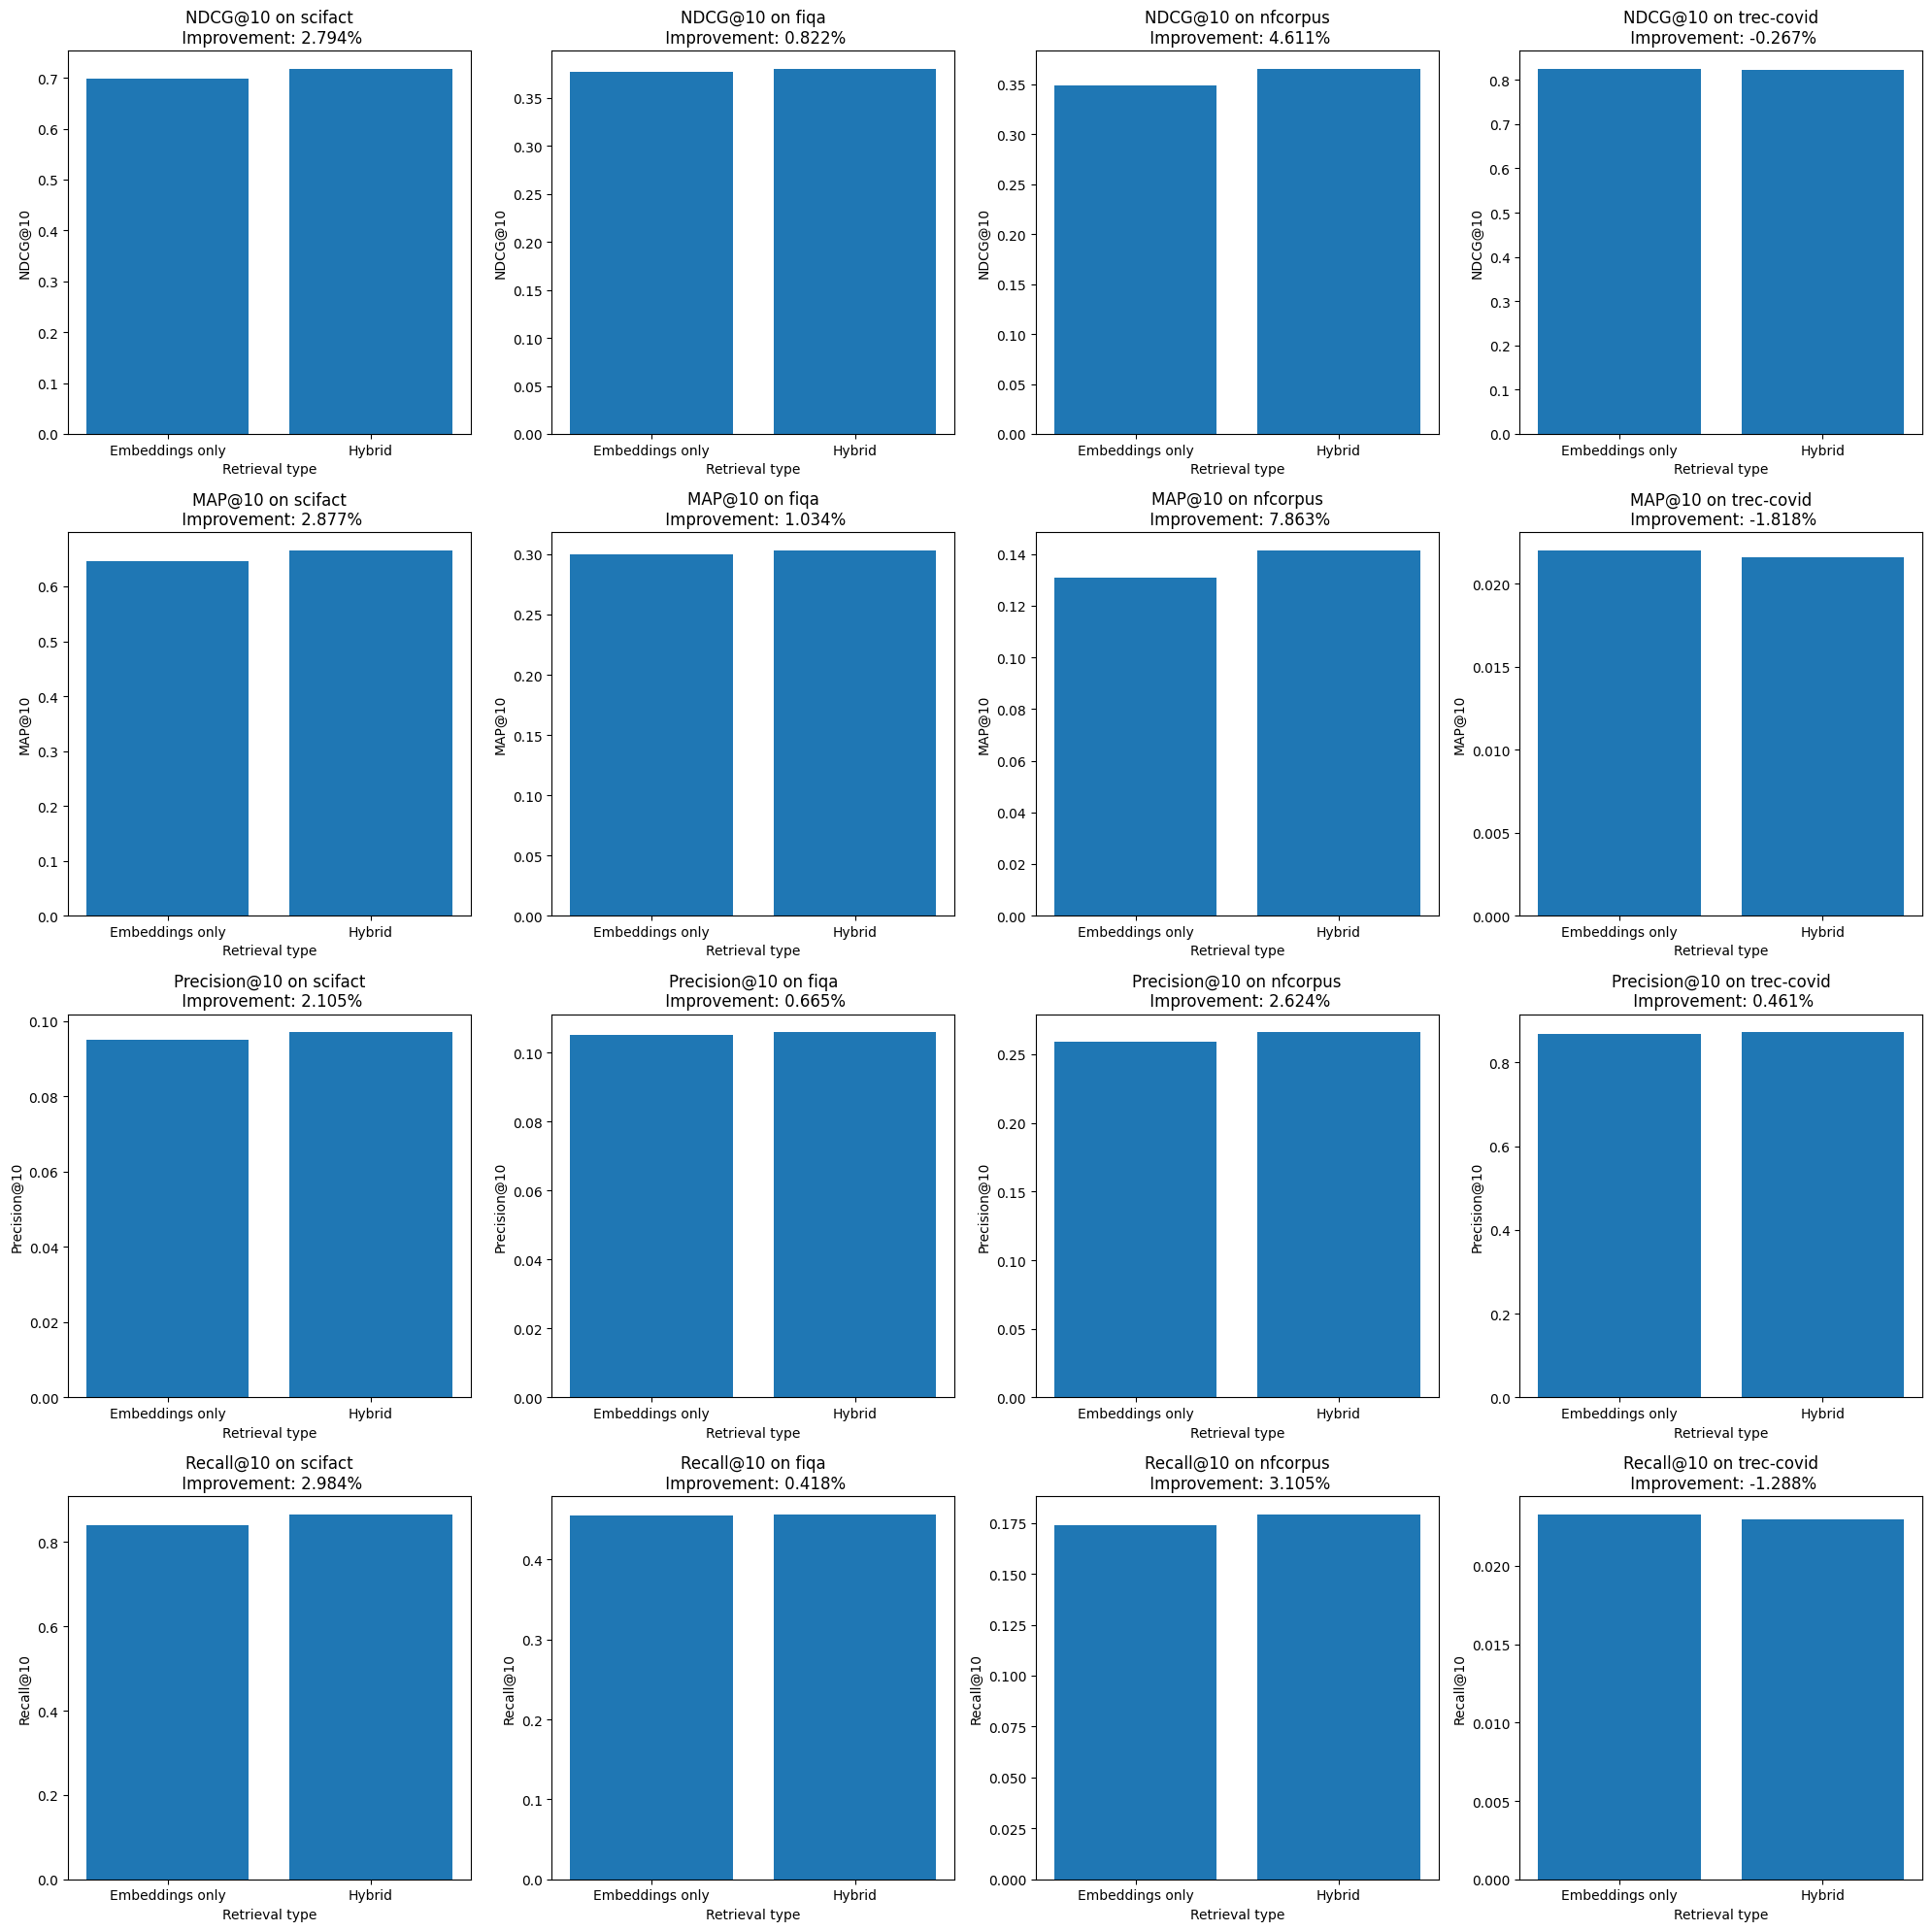

In [28]:
fig, axes = plt.subplots(4, 4, figsize=(20,20))
for i, data in enumerate(['scifact', 'fiqa', 'nfcorpus', 'trec-covid']):
    for j, metric_name in enumerate(['NDCG@10', 'MAP@10', 'Precision@10', 'Recall@10']):
        axes[j,i] = plot_metric_for_dataset(axes[j,i], data, metric_name)
plt.tight_layout()
plt.show()